<a href="https://colab.research.google.com/github/khloe-r/Handwriting-Recognition/blob/main/HandwritingRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwriting Recognition

1. Import Packages

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

2. Load Training Data

In [ ]:
nb_categories = 10 # 0-9

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", Y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


## Training Data
Using matplotlib to visualize the training data

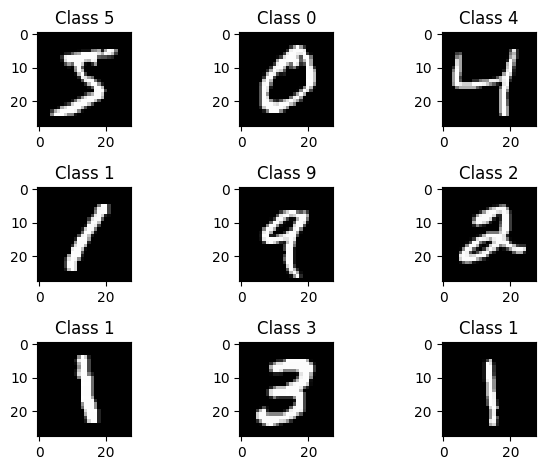

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[i]))

plt.tight_layout()

In [ ]:
# reshape the data

# convert 28 x 28 grid to 1 x 784 grid
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# convert values from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
# update array output to be in array format


Y_train = tf.keras.utils.to_categorical(Y_train, nb_categories)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_categories)

In [ ]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(512, input_shape=(784,)),
                              tf.keras.layers.Activation('relu'),
                              tf.keras.layers.Dropout(0.2),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Activation('softmax')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/4
469/469 [==============================] - 8s 12ms/step - loss: 0.2850 - accuracy: 0.9171 - val_loss: 0.1366 - val_accuracy: 0.9604
Epoch 2/4
469/469 [==============================] - 7s 15ms/step - loss: 0.1225 - accuracy: 0.9634 - val_loss: 0.0982 - val_accuracy: 0.9715
Epoch 3/4
469/469 [==============================] - 5s 11ms/step - loss: 0.0830 - accuracy: 0.9754 - val_loss: 0.0779 - val_accuracy: 0.9754
Epoch 4/4
469/469 [==============================] - 5s 11ms/step - loss: 0.0641 - accuracy: 0.9811 - val_loss: 0.0646 - val_accuracy: 0.9796


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
print('Test score:', score[0])
print('Test accuracy:', score[1])

[0.06463169306516647, 0.9796000123023987]
Test score: 0.06463169306516647
Test accuracy: 0.9796000123023987


## Building Predictions

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=-1)

print(predicted_classes)


313/313 [==============================] - 1s 3ms/step
[7 2 1 ... 4 5 6]


In [ ]:
Y_test = np.argmax(Y_test, axis=-1)
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]

# Some Correct Numbers

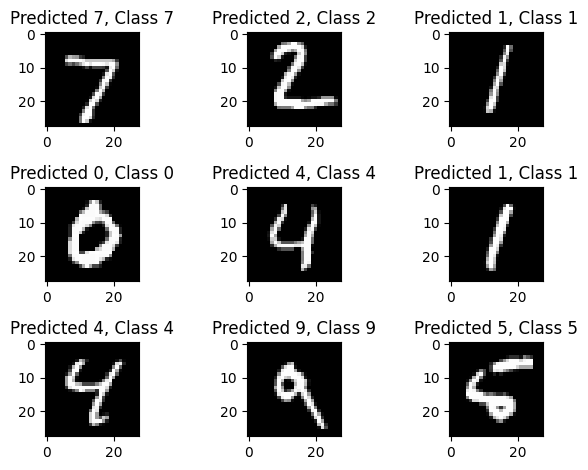

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct]))
plt.tight_layout()

# Some Incorrect Numbers

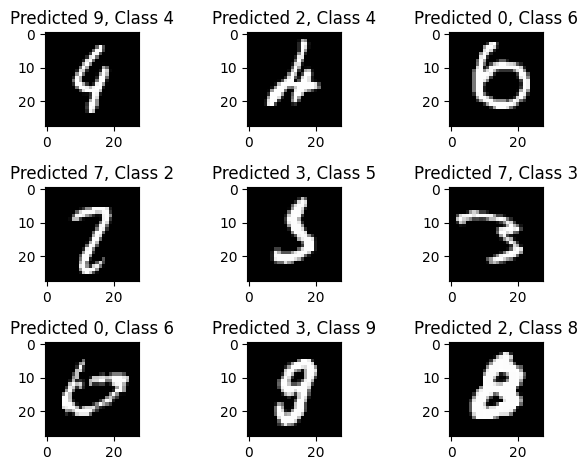

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect]))

plt.tight_layout()